# Digits MNIST image classification

Using AbelNN AutoML and AbelNN MLP

## EDA (Exploratory data analysis) and preprocessing

This dataset contains 42000 images of 10 different classes, corresponding to digits between 0 and 9 (inclusive).

In [2]:
import AbelNN

import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, precision_recall_curve
from sklearn.metrics import ConfusionMatrixDisplay

import matplotlib.pyplot as plt

from timeit import default_timer as timer

import pandas as pd
import seaborn as sns

import math as math

%matplotlib notebook

In [2]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 50)
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})

def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

dataset = load_dataset('../csv/digits mnist/data.csv')

y = dataset['label'].values

X = dataset.drop("label", axis="columns").to_numpy()

print(dataset.values.shape)

dataset.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,...,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [3]:
def showImg(i, label, imgset):
    size = int(math.sqrt(imgset[i].shape[0]))
    sample = np.reshape(imgset[i], (size,size))
    print(sample.shape)
    plt.figure()
    plt.title(label)
    plt.imshow(sample, 'gray')

## Data normalization and split of train and test subsets

In [4]:
X = (X - X.mean()) / X.std()

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=True)

y_train = y_train.reshape(y_train.shape[0], 1)
y_test = y_test.reshape(y_test.shape[0], 1)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

dicClases = {0:'0',1:'1',2:'2',3:'3',4:'4',5:'5',6:'6',7:'7',8:'8',9:'9'}

(21000, 784) (21000, 1)
(21000, 784) (21000, 1)


## Showing images

(28, 28)


<IPython.core.display.Javascript object>


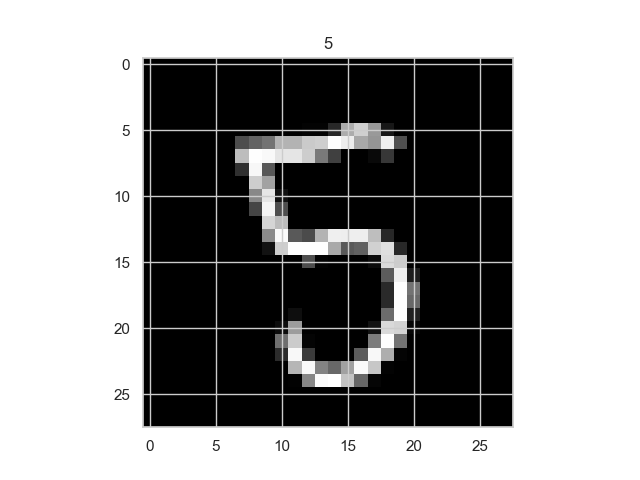

(28, 28)


<IPython.core.display.Javascript object>


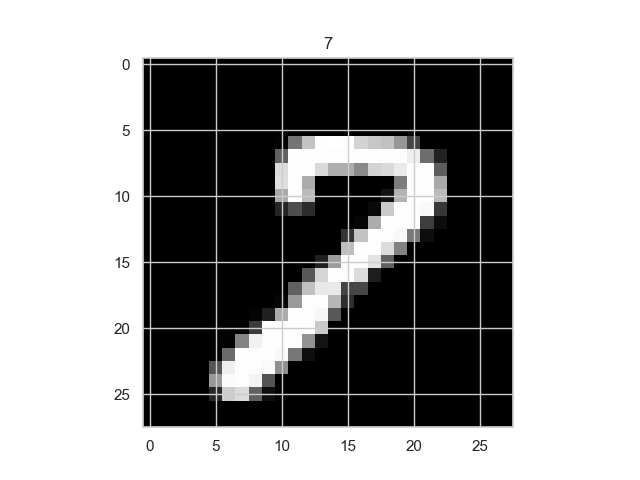

In [5]:
showImg(0, dicClases[y_train[0, 0]], x_train)
showImg(1, dicClases[y_train[1, 0]], x_train)

Reshape y_train and y_test with the shape of the neural network output for multiclass:

In [6]:
y_train = y_train.reshape(y_train.shape[0], 1)
y_train_multiclass = np.zeros((y_train.shape[0], len(dicClases.items())), dtype=int)

for i, yv in enumerate(y_train):
    y_train_multiclass[i][yv] = 1
    
print(y_train, '\n\n-----\n\n', y_train_multiclass)

[[5]
 [7]
 [4]
 ...
 [3]
 [0]
 [4]] 

-----

 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [7]:
y_test = y_test.reshape(y_test.shape[0], 1)
y_test_multiclass = np.zeros((y_test.shape[0], len(dicClases.items())), dtype=int)

for i, yv in enumerate(y_test):
    y_test_multiclass[i][yv] = 1
    
print(y_test, '\n\n-----\n\n', y_test_multiclass)

[[2]
 [3]
 [0]
 ...
 [1]
 [1]
 [4]] 

-----

 [[0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# Define default MLP model

Call the constructor of the Multilayer perceptron:

In [8]:
m = AbelNN.MLP()

# AbelNN AutoML

Use the AutoML model to find the best model for your train data:

In [86]:
au = AbelNN.AutoML(m)

start = timer()
clf = au.fit(x_train, y_train_multiclass, x_test, y_test_multiclass)
end = timer()

print('Time in seconds: ', end - start)

Time in seconds:  93.04856860000018


In this case, the AutoML model only need 93 seconds to find the best model.

## Best model found:

In [88]:
print(clf.learningRate, clf.batch_size, clf.activationFunction, clf.dropout, clf.pre_norm)

0.29386375993944325 1 relu 0 True


Best model found by the AutoML:

| Hyperparameter | Value |
|:---------------|-------|
| learningRate |   0.294    |
| batch_size   |   1    |
| activationFunction     |   'relu'    |
| dropout | 0 |
| pre_norm | True |

## Classification using the best model found by AbelNN AutoML

<IPython.core.display.Javascript object>


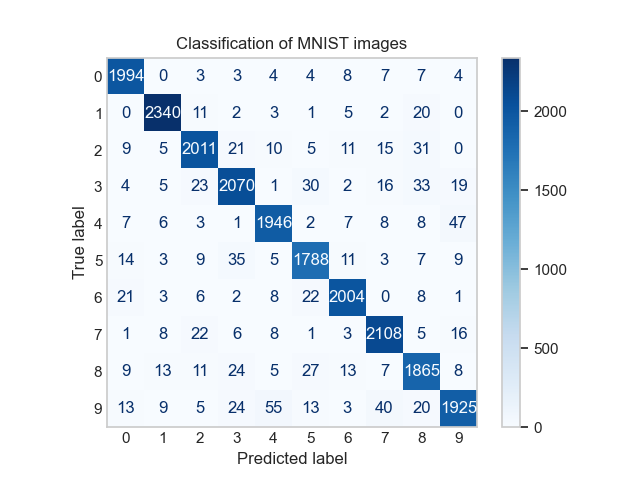

In [89]:
clf.fit(x_train, y_train_multiclass)
probabs = clf.predict_proba(x_test)
probabs_results = np.argmax(probabs, axis=1)



cmMT = confusion_matrix(y_test, probabs_results, normalize=None)
cmd = ConfusionMatrixDisplay(cmMT, display_labels=dicClases.values())
cmd = cmd.plot(include_values=True, cmap='Blues', ax=None, xticks_rotation='horizontal')
plt.title("Classification of MNIST images")
plt.tick_params(axis=u'both', which=u'both',length=0)
plt.grid(b=None)
plt.show()

In [90]:
accuracy_au = np.sum(probabs_results == np.argmax(y_test_multiclass, axis=1)) / probabs_results.shape[0]

print('Test accuracy:', round(accuracy_au,4))

Test accuracy: 0.9548


## Training error:

Mean error in the final layer during training, averaged over the 10 neurons in the final layer:

<IPython.core.display.Javascript object>


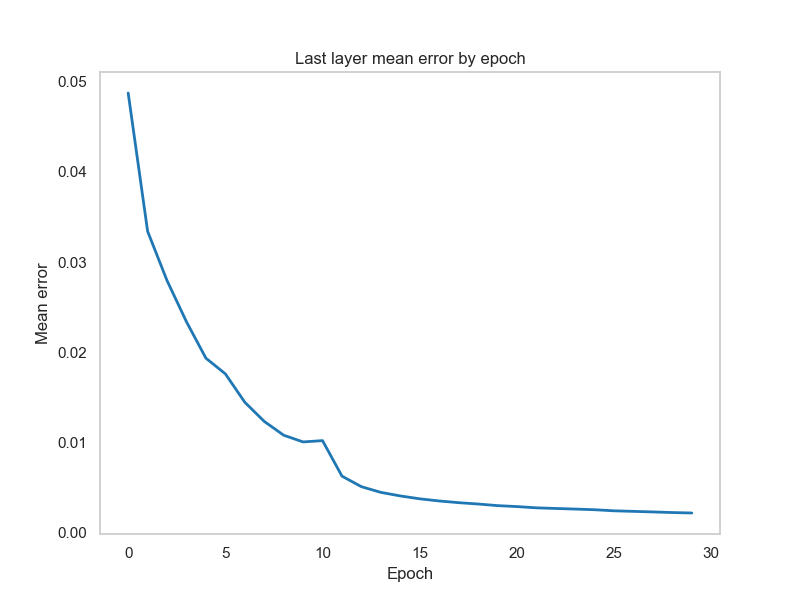

In [92]:
clf.plot_mean_error_last_layer()